This Notebook will be about the exploration of the merge dataset, as well as the model building and the feature extraction (which ones lead to top performances of POS).

In [1]:
import pandas as pd
X = pd.read_csv('output_extra_clean_10_percent.csv')
target = pd.read_csv('target_response_2015_8_2016_1_2017_6.csv')

In [2]:
X.head(1)

,Unnamed: 0,store_code,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_short_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_short_name,surroundings_bus_station_0_address_components_1_types_0,surroundings_bus_station_0_address_components_1_types_1,...,surroundings_transit_station_0_formatted_address,surroundings_transit_station_0_icon,surroundings_transit_station_0_latitude,surroundings_transit_station_0_longitude,surroundings_transit_station_0_name,surroundings_transit_station_0_place_id,surroundings_transit_station_0_types_0,surroundings_transit_station_0_types_1,surroundings_transit_station_0_types_2,surroundings_transit_station_0_types_3
0,0,10055,Switzerland,CH,country,political,Chêne-Bourg,Chêne-Bourg,locality,political,...,"1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,46.197612,6.19481,"Chêne-Bourg, La Mousse",ChIJua072vxvjEcRWeHQkLeaycU,bus_station,transit_station,point_of_interest,establishment


In [2]:
X = X.drop('Unnamed: 0', axis=1)

In [4]:
target.head(1)

,Unnamed: 0,store_code,POS_binary
0,0,10055,11825.0


In [3]:
target = target.drop('Unnamed: 0', axis=1)

We know that these two datasets have their row identified by a unique identifier called store_code. We also know that the id of the location and its surroundings should be the same, the we can do an inner join on the store_code which will merge both datasets based on what they have in common, which is store_code.

In [4]:
data_merge = pd.merge(target, X, left_index=True, right_index=True)

In [7]:
data_merge.head(1)

,store_code_x,POS_binary,store_code_y,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_short_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_short_name,surroundings_bus_station_0_address_components_1_types_0,...,surroundings_transit_station_0_formatted_address,surroundings_transit_station_0_icon,surroundings_transit_station_0_latitude,surroundings_transit_station_0_longitude,surroundings_transit_station_0_name,surroundings_transit_station_0_place_id,surroundings_transit_station_0_types_0,surroundings_transit_station_0_types_1,surroundings_transit_station_0_types_2,surroundings_transit_station_0_types_3
0,10055,11825.0,10055,Switzerland,CH,country,political,Chêne-Bourg,Chêne-Bourg,locality,...,"1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,46.197612,6.19481,"Chêne-Bourg, La Mousse",ChIJua072vxvjEcRWeHQkLeaycU,bus_station,transit_station,point_of_interest,establishment


In [8]:
len(data_merge)

546

The merge was succesfull with each surrounding finding its location. We can now also get rid of the redundant store codes and make it as one variable.

In [5]:
store_code = X.store_code
data_merge2 = data_merge.drop('store_code_x', axis=1)
data_merge2 = data_merge2.drop('store_code_y', axis=1)
data_merge2['store_code'] = store_code

In [10]:
data_merge2.head(1)

,POS_binary,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_short_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_short_name,surroundings_bus_station_0_address_components_1_types_0,surroundings_bus_station_0_address_components_1_types_1,surroundings_bus_station_0_address_components_2_long_name,...,surroundings_transit_station_0_icon,surroundings_transit_station_0_latitude,surroundings_transit_station_0_longitude,surroundings_transit_station_0_name,surroundings_transit_station_0_place_id,surroundings_transit_station_0_types_0,surroundings_transit_station_0_types_1,surroundings_transit_station_0_types_2,surroundings_transit_station_0_types_3,store_code
0,11825.0,Switzerland,CH,country,political,Chêne-Bourg,Chêne-Bourg,locality,political,Genève,...,https://maps.gstatic.com/mapfiles/place_api/ic...,46.197612,6.19481,"Chêne-Bourg, La Mousse",ChIJua072vxvjEcRWeHQkLeaycU,bus_station,transit_station,point_of_interest,establishment,10055


In [6]:
#Store code is just the ID and will have no impact on the model so we can drop this column
data_merge3 = data_merge2.drop('store_code', axis=1)

In [12]:
pd.set_option('display.max_columns', None)
#Now let's start exploring a little bit more
data_merge3.head()

,POS_binary,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_short_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_short_name,surroundings_bus_station_0_address_components_1_types_0,surroundings_bus_station_0_address_components_1_types_1,surroundings_bus_station_0_address_components_2_long_name,surroundings_bus_station_0_address_components_2_short_name,surroundings_bus_station_0_address_components_2_types_0,surroundings_bus_station_0_address_components_2_types_1,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_address_components_3_short_name,surroundings_bus_station_0_address_components_3_types_0,surroundings_bus_station_0_address_components_3_types_1,surroundings_bus_station_0_address_components_4_long_name,surroundings_bus_station_0_address_components_4_short_name,surroundings_bus_station_0_address_components_4_types_0,surroundings_bus_station_0_formatted_address,surroundings_bus_station_0_icon,surroundings_bus_station_0_latitude,surroundings_bus_station_0_longitude,surroundings_bus_station_0_name,surroundings_bus_station_0_place_id,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_0_long_name,surroundings_restaurant_0_address_components_0_short_name,surroundings_restaurant_0_address_components_0_types_0,surroundings_restaurant_0_address_components_1_long_name,surroundings_restaurant_0_address_components_1_short_name,surroundings_restaurant_0_address_components_1_types_0,surroundings_restaurant_0_address_components_2_long_name,surroundings_restaurant_0_address_components_2_short_name,surroundings_restaurant_0_address_components_2_types_0,surroundings_restaurant_0_address_components_2_types_1,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_address_components_3_short_name,surroundings_restaurant_0_address_components_3_types_0,surroundings_restaurant_0_address_components_3_types_1,surroundings_restaurant_0_address_components_4_long_name,surroundings_restaurant_0_address_components_4_short_name,surroundings_restaurant_0_address_components_4_types_0,surroundings_restaurant_0_formatted_address,surroundings_restaurant_0_icon,surroundings_restaurant_0_international_phone_number,surroundings_restaurant_0_latitude,surroundings_restaurant_0_longitude,surroundings_restaurant_0_name,surroundings_restaurant_0_place_id,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_0_long_name,surroundings_store_0_address_components_0_short_name,surroundings_store_0_address_components_0_types_0,surroundings_store_0_address_components_1_long_name,surroundings_store_0_address_components_1_short_name,surroundings_store_0_address_components_1_types_0,surroundings_store_0_address_components_2_long_name,surroundings_store_0_address_components_2_short_name,surroundings_store_0_address_components_2_types_0,surroundings_store_0_address_components_2_types_1,surroundings_store_0_address_components_3_long_name,surroundings_store_0_address_components_3_short_name,surroundings_store_0_address_components_3_types_0,surroundings_store_0_address_components_3_types_1,surroundings_store_0_address_components_4_long_name,surroundings_store_0_address_components_4_short_name,surroundings_store_0_address_components_4_types_0,surroundings_store_0_formatted_address,surroundings_store_0_icon,surroundings_store_0_international_phone_number,surroundings_store_0_latitude,surroundings_store_0_longitude,surroundings_store_0_name,surroundings_store_0_place_id,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_stor

We can already see that there is a redundancy where long_name and short_name variables are exactly the same information but written in a different way e.g Geneve is the long name and GE is the short name. So we can drop one of the two as the other already contains the information we want.

In [7]:
data_merge4 = data_merge3.drop(['surroundings_bus_station_0_address_components_0_short_name', 'surroundings_bus_station_0_address_components_1_short_name', 'surroundings_bus_station_0_address_components_2_short_name',
                                'surroundings_bus_station_0_address_components_3_short_name', 'surroundings_bus_station_0_address_components_4_short_name',
                                'surroundings_restaurant_0_address_components_0_short_name', 'surroundings_restaurant_0_address_components_1_short_name', 'surroundings_restaurant_0_address_components_2_short_name', 
                                'surroundings_restaurant_0_address_components_3_short_name', 'surroundings_restaurant_0_address_components_4_short_name', 
                                'surroundings_store_0_address_components_0_short_name', 'surroundings_store_0_address_components_1_short_name', 'surroundings_store_0_address_components_2_short_name', 
                                'surroundings_store_0_address_components_3_short_name', 'surroundings_store_0_address_components_4_short_name', 'surroundings_store_1_address_components_0_short_name', 
                                'surroundings_store_1_address_components_1_short_name', 'surroundings_store_1_address_components_2_short_name', 'surroundings_store_1_address_components_3_short_name', 
                                'surroundings_store_1_address_components_4_short_name', 'surroundings_store_2_address_components_0_short_name', 'surroundings_store_2_address_components_1_short_name',
                                'surroundings_store_2_address_components_2_short_name', 'surroundings_store_2_address_components_3_short_name', 'surroundings_store_2_address_components_4_short_name',
                                'surroundings_transit_station_0_address_components_0_short_name', 'surroundings_transit_station_0_address_components_1_short_name', 'surroundings_transit_station_0_address_components_2_short_name',
                                'surroundings_transit_station_0_address_components_3_short_name', 'surroundings_transit_station_0_address_components_4_short_name'], axis=1)

In [14]:
len(data_merge4.columns)

138

In [15]:
data_merge4.head()

,POS_binary,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_types_0,surroundings_bus_station_0_address_components_1_types_1,surroundings_bus_station_0_address_components_2_long_name,surroundings_bus_station_0_address_components_2_types_0,surroundings_bus_station_0_address_components_2_types_1,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_address_components_3_types_0,surroundings_bus_station_0_address_components_3_types_1,surroundings_bus_station_0_address_components_4_long_name,surroundings_bus_station_0_address_components_4_types_0,surroundings_bus_station_0_formatted_address,surroundings_bus_station_0_icon,surroundings_bus_station_0_latitude,surroundings_bus_station_0_longitude,surroundings_bus_station_0_name,surroundings_bus_station_0_place_id,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_0_long_name,surroundings_restaurant_0_address_components_0_types_0,surroundings_restaurant_0_address_components_1_long_name,surroundings_restaurant_0_address_components_1_types_0,surroundings_restaurant_0_address_components_2_long_name,surroundings_restaurant_0_address_components_2_types_0,surroundings_restaurant_0_address_components_2_types_1,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_address_components_3_types_0,surroundings_restaurant_0_address_components_3_types_1,surroundings_restaurant_0_address_components_4_long_name,surroundings_restaurant_0_address_components_4_types_0,surroundings_restaurant_0_formatted_address,surroundings_restaurant_0_icon,surroundings_restaurant_0_international_phone_number,surroundings_restaurant_0_latitude,surroundings_restaurant_0_longitude,surroundings_restaurant_0_name,surroundings_restaurant_0_place_id,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_0_long_name,surroundings_store_0_address_components_0_types_0,surroundings_store_0_address_components_1_long_name,surroundings_store_0_address_components_1_types_0,surroundings_store_0_address_components_2_long_name,surroundings_store_0_address_components_2_types_0,surroundings_store_0_address_components_2_types_1,surroundings_store_0_address_components_3_long_name,surroundings_store_0_address_components_3_types_0,surroundings_store_0_address_components_3_types_1,surroundings_store_0_address_components_4_long_name,surroundings_store_0_address_components_4_types_0,surroundings_store_0_formatted_address,surroundings_store_0_icon,surroundings_store_0_international_phone_number,surroundings_store_0_latitude,surroundings_store_0_longitude,surroundings_store_0_name,surroundings_store_0_place_id,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_0_website,surroundings_store_1_address_components_0_long_name,surroundings_store_1_address_components_0_types_0,surroundings_store_1_address_components_1_long_name,surroundings_store_1_address_components_1_types_0,surroundings_store_1_address_components_2_long_name,surroundings_store_1_address_components_2_types_0,surroundings_store_1_address_components_2_types_1,surroundings_store_1_address_components_3_long_name,surroundings_store_1_address_components_3_types_0,surroundings_store_1_address_components_3_types_1,surroundings_store_1_address_components_4_long_name,surroundings_store_1_address_components_4_types_0,surroundings_store_1_formatted_address,surroundings_store_1_icon,surroundings_store_1_international_phone_number,surroundings_store_1_latitude,surroundings_store_1_longitude,surroundings_store_1_name

Next we can see that each surrounding has its own Id. Just like store_code, these columns will bring nothing so we can remove them.

In [8]:
data_merge5 = data_merge4.drop(['surroundings_bus_station_0_place_id', 'surroundings_restaurant_0_place_id', 'surroundings_store_0_place_id', 
                               'surroundings_store_1_place_id', 'surroundings_store_2_place_id', 'surroundings_transit_station_0_place_id'], axis=1)

In [17]:
len(data_merge5.columns)

132

Now let's go back before proceeding, to the columns that still have missing values.


In [18]:
data_merge5.isnull().sum()

POS_binary                                                        0
surroundings_bus_station_0_address_components_0_long_name        31
surroundings_bus_station_0_address_components_0_types_0          31
surroundings_bus_station_0_address_components_0_types_1          44
surroundings_bus_station_0_address_components_1_long_name        31
surroundings_bus_station_0_address_components_1_types_0          31
surroundings_bus_station_0_address_components_1_types_1          40
surroundings_bus_station_0_address_components_2_long_name        31
surroundings_bus_station_0_address_components_2_types_0          31
surroundings_bus_station_0_address_components_2_types_1          31
surroundings_bus_station_0_address_components_3_long_name        31
surroundings_bus_station_0_address_components_3_types_0          31
surroundings_bus_station_0_address_components_3_types_1          31
surroundings_bus_station_0_address_components_4_long_name        31
surroundings_bus_station_0_address_components_4_

The number vary a little bit from one surrounding to another, but globally these values seem to belong to the same entries. This means that some entries have missing values everywhere or almost everywhere and are thus not worth keeping.

In [9]:
data_merge6 = data_merge5.dropna()

In [11]:
len(data_merge6)

546

After all the NA removal, we are left with 396 entries to work with. It is not a lot but we can still make something out of it.

In [21]:
data_merge6.head()

,POS_binary,surroundings_bus_station_0_address_components_0_long_name,surroundings_bus_station_0_address_components_0_types_0,surroundings_bus_station_0_address_components_0_types_1,surroundings_bus_station_0_address_components_1_long_name,surroundings_bus_station_0_address_components_1_types_0,surroundings_bus_station_0_address_components_1_types_1,surroundings_bus_station_0_address_components_2_long_name,surroundings_bus_station_0_address_components_2_types_0,surroundings_bus_station_0_address_components_2_types_1,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_address_components_3_types_0,surroundings_bus_station_0_address_components_3_types_1,surroundings_bus_station_0_address_components_4_long_name,surroundings_bus_station_0_address_components_4_types_0,surroundings_bus_station_0_formatted_address,surroundings_bus_station_0_icon,surroundings_bus_station_0_latitude,surroundings_bus_station_0_longitude,surroundings_bus_station_0_name,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_0_long_name,surroundings_restaurant_0_address_components_0_types_0,surroundings_restaurant_0_address_components_1_long_name,surroundings_restaurant_0_address_components_1_types_0,surroundings_restaurant_0_address_components_2_long_name,surroundings_restaurant_0_address_components_2_types_0,surroundings_restaurant_0_address_components_2_types_1,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_address_components_3_types_0,surroundings_restaurant_0_address_components_3_types_1,surroundings_restaurant_0_address_components_4_long_name,surroundings_restaurant_0_address_components_4_types_0,surroundings_restaurant_0_formatted_address,surroundings_restaurant_0_icon,surroundings_restaurant_0_international_phone_number,surroundings_restaurant_0_latitude,surroundings_restaurant_0_longitude,surroundings_restaurant_0_name,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_0_long_name,surroundings_store_0_address_components_0_types_0,surroundings_store_0_address_components_1_long_name,surroundings_store_0_address_components_1_types_0,surroundings_store_0_address_components_2_long_name,surroundings_store_0_address_components_2_types_0,surroundings_store_0_address_components_2_types_1,surroundings_store_0_address_components_3_long_name,surroundings_store_0_address_components_3_types_0,surroundings_store_0_address_components_3_types_1,surroundings_store_0_address_components_4_long_name,surroundings_store_0_address_components_4_types_0,surroundings_store_0_formatted_address,surroundings_store_0_icon,surroundings_store_0_international_phone_number,surroundings_store_0_latitude,surroundings_store_0_longitude,surroundings_store_0_name,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_0_website,surroundings_store_1_address_components_0_long_name,surroundings_store_1_address_components_0_types_0,surroundings_store_1_address_components_1_long_name,surroundings_store_1_address_components_1_types_0,surroundings_store_1_address_components_2_long_name,surroundings_store_1_address_components_2_types_0,surroundings_store_1_address_components_2_types_1,surroundings_store_1_address_components_3_long_name,surroundings_store_1_address_components_3_types_0,surroundings_store_1_address_components_3_types_1,surroundings_store_1_address_components_4_long_name,surroundings_store_1_address_components_4_types_0,surroundings_store_1_formatted_address,surroundings_store_1_icon,surroundings_store_1_international_phone_number,surroundings_store_1_latitude,surroundings_store_1_longitude,surroundings_store_1_name,surroundings_store_1_types_0,surroundings_store_1_types_1,surroundings_store_1_types_2,surroundings_

We can see redundancies in the long name adresses of each surrounding, where we have a column which contains a formated address e.g 1225 Chêne-Bourg, Switzerland. This information can also be found in three other columns e.g 
surroundings_bus_station_0_address_components_4_long_name, surroundings_bus_station_0_address_components_1_long_name, surroundings_bus_station_0_address_components_0_long_name
which holds respectively 1225 as the postal code, Chene-Bourg as the street and Switzerland as the country.
Since all the information is packed into one variable, we can remove the other three and do it for all the surroundings.

In [10]:
data_merge7 = data_merge6.drop(['surroundings_bus_station_0_address_components_4_long_name', 'surroundings_restaurant_0_address_components_4_long_name', 'surroundings_store_0_address_components_4_long_name', 'surroundings_transit_station_0_address_components_4_long_name',
                               'surroundings_bus_station_0_address_components_1_long_name', 'surroundings_restaurant_0_address_components_1_long_name', 'surroundings_store_0_address_components_1_long_name', 'surroundings_transit_station_0_address_components_1_long_name', 
                               'surroundings_bus_station_0_address_components_0_long_name', 'surroundings_restaurant_0_address_components_0_long_name', 'surroundings_store_0_address_components_0_long_name', 'surroundings_transit_station_0_address_components_0_long_name'], axis=1)

In [23]:
len(data_merge7.columns)

120

Now there are other columns that can be discarded. Phone number is one of them, the reason is because each surrounding has its own phone number hence is way too diverse.

In [11]:
data_merge7 = data_merge7.drop(['surroundings_restaurant_0_international_phone_number', 'surroundings_store_0_international_phone_number', 'surroundings_store_1_international_phone_number', 'surroundings_store_2_international_phone_number'],axis=1)

In [25]:
len(data_merge7.columns)

116

Aside from the names, each surrounding also has certain types associated with it. However each name has a type e.g Switzerland being a country so names and types logically should give the same information and thus we can drop one of the two. Here we will drop the type columns and keep the names.

In [12]:
data_merge8 = data_merge7.drop(['surroundings_bus_station_0_address_components_0_types_0', 'surroundings_bus_station_0_address_components_0_types_1', 'surroundings_bus_station_0_address_components_1_types_0', 'surroundings_bus_station_0_address_components_1_types_1', 'surroundings_bus_station_0_address_components_2_types_0', 'surroundings_bus_station_0_address_components_2_types_1', 'surroundings_bus_station_0_address_components_3_types_0', 'surroundings_bus_station_0_address_components_3_types_1', 'surroundings_bus_station_0_address_components_4_types_0', 'surroundings_restaurant_0_address_components_0_types_0', 'surroundings_restaurant_0_address_components_1_types_0', 'surroundings_restaurant_0_address_components_2_types_0', 'surroundings_restaurant_0_address_components_2_types_1', 'surroundings_restaurant_0_address_components_3_types_0', 'surroundings_restaurant_0_address_components_3_types_1', 'surroundings_restaurant_0_address_components_4_types_0', 'surroundings_store_0_address_components_0_types_0', 'surroundings_store_0_address_components_1_types_0', 'surroundings_store_0_address_components_2_long_name', 'surroundings_store_0_address_components_2_types_0', 'surroundings_store_0_address_components_2_types_1', 'surroundings_store_0_address_components_3_types_0', 'surroundings_store_0_address_components_3_types_1', 'surroundings_store_0_address_components_4_types_0', 'surroundings_store_1_address_components_0_long_name', 'surroundings_store_1_address_components_0_types_0', 'surroundings_store_1_address_components_1_types_0', 'surroundings_store_1_address_components_2_types_0', 'surroundings_store_1_address_components_2_types_1', 'surroundings_store_1_address_components_3_types_0', 'surroundings_store_1_address_components_3_types_1', 'surroundings_store_1_address_components_4_types_0', 'surroundings_store_2_address_components_0_long_name', 'surroundings_store_2_address_components_0_types_0', 'surroundings_store_2_address_components_1_types_0', 'surroundings_store_2_address_components_2_long_name', 'surroundings_store_2_address_components_2_types_0', 'surroundings_store_2_address_components_2_types_1', 'surroundings_store_2_address_components_3_types_0', 'surroundings_store_2_address_components_3_types_1', 'surroundings_store_2_address_components_4_types_0', 'surroundings_transit_station_0_address_components_0_types_0', 'surroundings_transit_station_0_address_components_1_types_0', 'surroundings_transit_station_0_address_components_1_types_1', 'surroundings_transit_station_0_address_components_2_types_0', 'surroundings_transit_station_0_address_components_2_types_1', 'surroundings_transit_station_0_address_components_3_types_0', 'surroundings_transit_station_0_address_components_3_types_1', 'surroundings_transit_station_0_address_components_4_types_0'],axis=1)

In [27]:
len(data_merge8.columns)

67

We still have 67 columns left, which can still be reduced. We have in total 6 surroundings: bus station, restaurants, 3 types of shops and transit station. We could have a look at the correlation between these surroundings in general and if correlation there is, remove all the columns belonging to one of the correlated surrounding. However The csv we are working with does not allow that as we are talking to a more general view. For that we will take the json file are recreate a csv but with just the higher levels as columns.

In [28]:
import json
from pandas.io.json import json_normalize


def loading_file():
    #File path
    file_path = 'Surroundings.json'

    #Loading json file
    json_data = open(file_path)
    data = json.load(json_data)
    return data

#Storing avaliable keys
def data_keys(data):
    keys = {}
    for i in data:
        for k in i.keys():
            keys[k] = 1

    keys = keys.keys()

#Excluding nested arrays from keys - hard coded -> IMPROVE
    new_keys = [x for x in keys if
    x != 'attributes' and
    x != 'change']

    return new_keys

#Excluding nested arrays from json dictionary
def new_data(data, keys):
    new_data = []
    for i in range(0, len(data)):
        x = {k:v for (k,v) in data[i].items() if k in keys }
        new_data.append(x)
    return new_data

def csv_out(data):
     data.to_csv('out.csv',encoding='utf-8')


data_file = loading_file()
keys = data_keys(data_file)
table = new_data(data_file, keys)
csv_out(json_normalize(table))


In [29]:
surr = pd.read_csv('out.csv')
surr.head()

,Unnamed: 0,store_code,surroundings.accounting,surroundings.airport,surroundings.amusement_park,surroundings.aquarium,surroundings.art_gallery,surroundings.atm,surroundings.bakery,surroundings.bank,surroundings.bar,surroundings.beauty_salon,surroundings.bicycle_store,surroundings.book_store,surroundings.bowling_alley,surroundings.bus_station,surroundings.cafe,surroundings.campground,surroundings.car_dealer,surroundings.car_rental,surroundings.car_repair,surroundings.car_wash,surroundings.casino,surroundings.cemetery,surroundings.church,surroundings.city_hall,surroundings.clothing_store,surroundings.convenience_store,surroundings.courthouse,surroundings.dentist,surroundings.department_store,surroundings.doctor,surroundings.electrician,surroundings.electronics_store,surroundings.embassy,surroundings.fire_station,surroundings.florist,surroundings.funeral_home,surroundings.furniture_store,surroundings.gas_station,surroundings.gym,surroundings.hair_care,surroundings.hardware_store,surroundings.hindu_temple,surroundings.home_goods_store,surroundings.hospital,surroundings.insurance_agency,surroundings.jewelry_store,surroundings.laundry,surroundings.lawyer,surroundings.library,surroundings.liquor_store,surroundings.local_government_office,surroundings.locksmith,surroundings.lodging,surroundings.meal_delivery,surroundings.meal_takeaway,surroundings.mosque,surroundings.movie_rental,surroundings.movie_theater,surroundings.moving_company,surroundings.museum,surroundings.night_club,surroundings.painter,surroundings.park,surroundings.parking,surroundings.pet_store,surroundings.pharmacy,surroundings.physiotherapist,surroundings.plumber,surroundings.police,surroundings.post_office,surroundings.real_estate_agency,surroundings.restaurant,surroundings.roofing_contractor,surroundings.rv_park,surroundings.shoe_store,surroundings.shopping_mall,surroundings.spa,surroundings.stadium,surroundings.storage,surroundings.store,surroundings.subway_station,surroundings.synagogue,surroundings.taxi_stand,surroundings.train_station,surroundings.transit_station,surroundings.travel_agency,surroundings.university,surroundings.veterinary_care,surroundings.zoo
0,0,10055,[{'opening_hours': {'periods': [{'open': {'day...,[],[],[],"[{'types': ['art_gallery', 'point_of_interest'...","[{'types': ['bank', 'atm', 'finance', 'point_o...","[{'types': ['bakery', 'food', 'store', 'point_...","[{'types': ['bank', 'finance', 'point_of_inter...","[{'types': ['restaurant', 'bar', 'food', 'poin...","[{'types': ['beauty_salon', 'point_of_interest...","[{'types': ['bicycle_store', 'store', 'point_o...",[],[],"[{'types': ['bus_station', 'transit_station', ...","[{'types': ['restaurant', 'cafe', 'food', 'poi...",[],[],[],"[{'types': ['car_repair', 'point_of_interest',...",[],[],[],[],[],[{'opening_hours': {'periods': [{'open': {'day...,[],[],"[{'types': ['dentist', 'health', 'point_of_int...",[],"[{'types': ['doctor', 'health', 'point_of_inte...","[{'types': ['electrician', 'point_of_interest'...",[{'opening_hours': {'periods': [{'open': {'day...,[],[],[{'opening_hours': {'periods': [{'open': {'day...,[],[{'opening_hours': {'periods': [{'open': {'day...,[{'opening_hours': {'periods': [{'open': {'day...,[{'opening_hours': {'periods': [{'open': {'day...,"[{'types': ['hair_care', 'health', 'point_of_i...","[{'types': ['furniture_store', 'hardware_store...",[],[{'opening_hours': {'periods': [{'open': {'day...,"[{'types': ['gym', 'hospital', 'insurance_agen...","[{'types': ['gym', 'hospital', 'insurance_agen...",[],"[{'types': ['laundry', 'point_of_interest', 'e...",[],[],"[{'types': ['liquor_store', 'store', 'point_of...",[],[],[],[],[],[],[],[],"[{'types': ['moving_company', 'point_of_intere...",[],[],"[{'types': ['painter', 'point_of_interest', 'e...",[],"[{'types': ['parking', 'point_of_interest', 'e...",[],[{'opening_hours': {'periods': [{'open': {'day...,"[{'types': ['physiotherapist', 'health', 'poin...",[],[],"[{'types': ['post_office', 'finance', 'point_o...",[{'opening_hours': {'

Now we have a csv with all the high level keys, since we are just concerned about potential correlations between the presence of one surrounding and another, we can transform all the columns into binary problems where [] have no informations so NA so abscence, while [...] contains information about the surrounding so it exists so 1.

In [31]:
import numpy as np
surr2 = surr.replace('[]', np.nan)
surr2 = surr2.drop('Unnamed: 0', axis=1)
surr2 = surr2.replace({'^\[[\s\S]+': '1'}, regex=True)
surr2.head()

,store_code,surroundings.accounting,surroundings.airport,surroundings.amusement_park,surroundings.aquarium,surroundings.art_gallery,surroundings.atm,surroundings.bakery,surroundings.bank,surroundings.bar,surroundings.beauty_salon,surroundings.bicycle_store,surroundings.book_store,surroundings.bowling_alley,surroundings.bus_station,surroundings.cafe,surroundings.campground,surroundings.car_dealer,surroundings.car_rental,surroundings.car_repair,surroundings.car_wash,surroundings.casino,surroundings.cemetery,surroundings.church,surroundings.city_hall,surroundings.clothing_store,surroundings.convenience_store,surroundings.courthouse,surroundings.dentist,surroundings.department_store,surroundings.doctor,surroundings.electrician,surroundings.electronics_store,surroundings.embassy,surroundings.fire_station,surroundings.florist,surroundings.funeral_home,surroundings.furniture_store,surroundings.gas_station,surroundings.gym,surroundings.hair_care,surroundings.hardware_store,surroundings.hindu_temple,surroundings.home_goods_store,surroundings.hospital,surroundings.insurance_agency,surroundings.jewelry_store,surroundings.laundry,surroundings.lawyer,surroundings.library,surroundings.liquor_store,surroundings.local_government_office,surroundings.locksmith,surroundings.lodging,surroundings.meal_delivery,surroundings.meal_takeaway,surroundings.mosque,surroundings.movie_rental,surroundings.movie_theater,surroundings.moving_company,surroundings.museum,surroundings.night_club,surroundings.painter,surroundings.park,surroundings.parking,surroundings.pet_store,surroundings.pharmacy,surroundings.physiotherapist,surroundings.plumber,surroundings.police,surroundings.post_office,surroundings.real_estate_agency,surroundings.restaurant,surroundings.roofing_contractor,surroundings.rv_park,surroundings.shoe_store,surroundings.shopping_mall,surroundings.spa,surroundings.stadium,surroundings.storage,surroundings.store,surroundings.subway_station,surroundings.synagogue,surroundings.taxi_stand,surroundings.train_station,surroundings.transit_station,surroundings.travel_agency,surroundings.university,surroundings.veterinary_care,surroundings.zoo
0,10055,1,NaN,NaN,NaN,1,1,1,1,1,1,1,NaN,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,1,1,1,NaN,NaN,1,NaN,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,1,NaN,1,1,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,1,1,NaN,1,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,10079,1,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,1,1,1,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,NaN,1,NaN,1,1,NaN,1,1,NaN,1,1,NaN,NaN,1,1,1,NaN,NaN,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
3,10086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
4,10111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


Now we have our binary problem. The next step is to look at the correlations between the abscence of surroundings.
For that we will use the misingno library which is made to work and explore correlations between features with a lot of NAs. The principle is that the missing value of a feature if there is a correlation, should cause another feature to also have a missing value. However we will first remove surroundings that simply do not exist in any entry.

In [32]:
col_name = ['store_code', 'accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'fire_station', 'florist', 'funeral_home', 'furniture_store', 'gas_station', 'gym', 'hair_care', 'hardware_store', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_store', 'pharmacy', 'physiotherapist', 'plumber', 'police', 'post_office', 'real_estate_agency', 'restaurant', 'roofing_contractor', 'rv_park', 'shoe_store', 'shopping_mall', 'spa', 'stadium', 'storage', 'store', 'subway_station', 'synagogue', 'taxi_stand', 'train_station', 'transit_station', 'travel_agency', 'university', 'veterinary_care', 'zoo']
surr2.columns = col_name
print(len(surr2), len(surr2.columns))
surr3 = surr2.dropna(thresh=len(surr2) - 545, axis=1)
print(len(surr3.columns))

546 90
88


So two columns are nonexistant. 

UnboundLocalError: local variable 'ax2' referenced before assignment

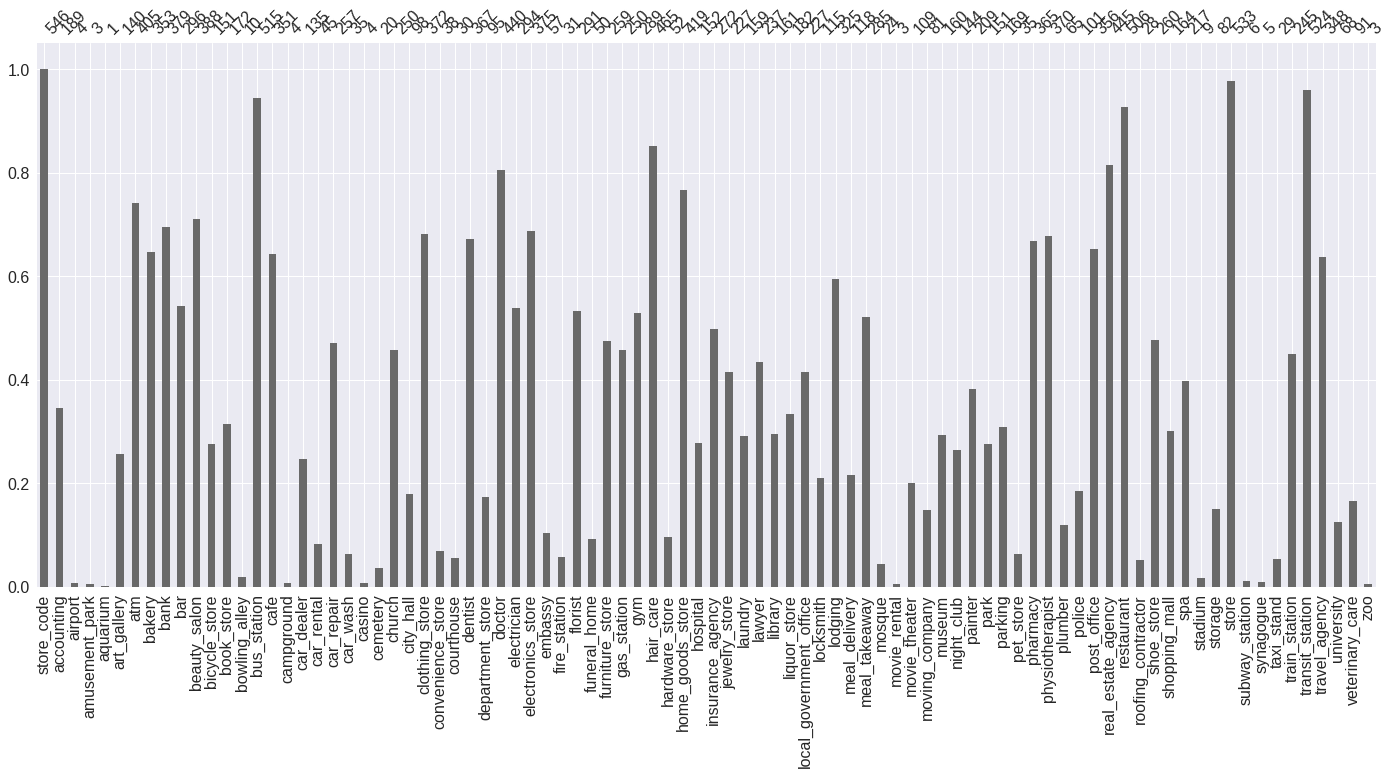

In [35]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
msno.bar(surr3)

Now we have 88 global surroundings so doing a correlation matrix with so many of them is out of question, however we can have a look at the surroundings that are missing less than 10% of values, which correspond to the ones we have so bus station, restaurants, stores and transit station.

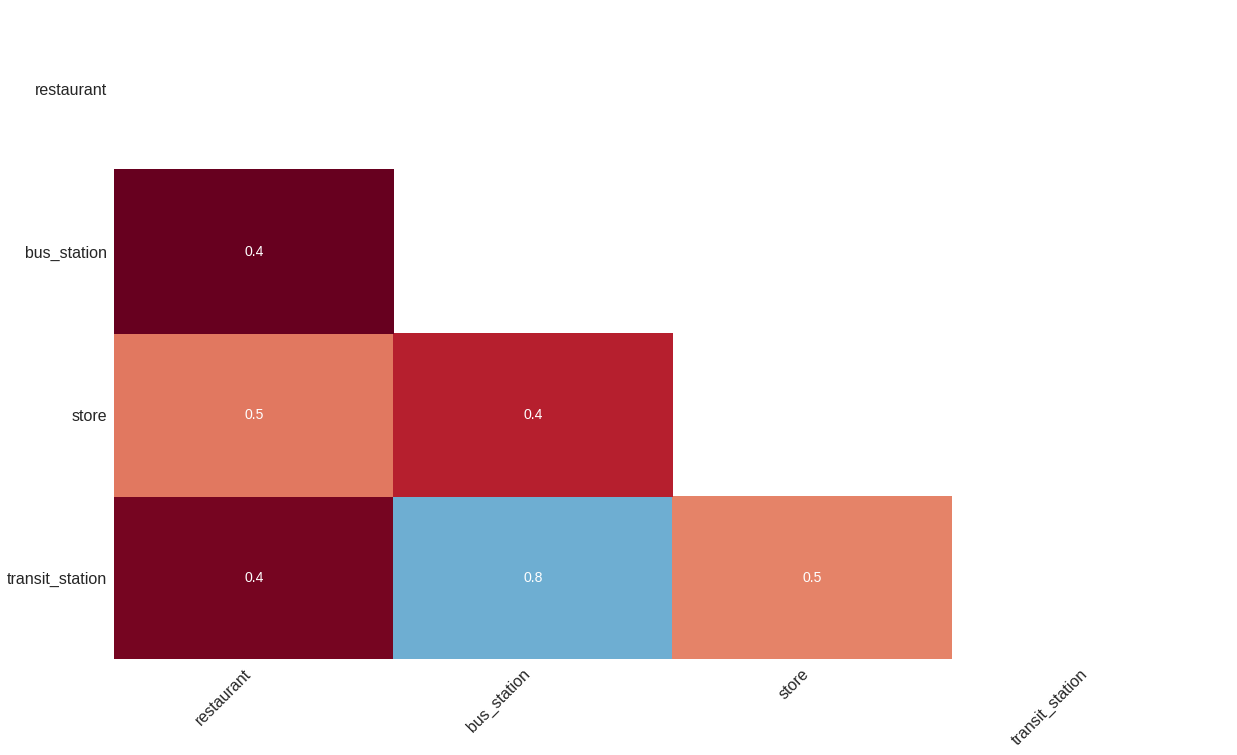

In [36]:
msno.heatmap(surr3[['restaurant', 'bus_station', 'store', 'transit_station']])

As we can see, there is a clear positive correlation between transit_station and bus station which makes sense. Now we can go back to our previous dataframe and remove all the columns involved with transit station.

In [13]:
data_merge8 = data_merge8.drop(['surroundings_transit_station_0_address_components_2_long_name', 'surroundings_transit_station_0_address_components_3_long_name', 'surroundings_transit_station_0_formatted_address', 'surroundings_transit_station_0_icon', 'surroundings_transit_station_0_name', 'surroundings_transit_station_0_types_0', 'surroundings_transit_station_0_types_1', 'surroundings_transit_station_0_types_2', 'surroundings_transit_station_0_types_3'], axis=1)

In [28]:
len(data_merge8.columns)

58

Other variables can still be removed. The formated address may encompass 3 variables that we previously removed, but they are rather quite unique and thus can be removed. Another variable that can be discarded is the name of the surrounding: each surrounding has its own name so it is too distinct hence can be removed.

In [14]:
data_merge8 = data_merge8.drop(['surroundings_bus_station_0_formatted_address', 'surroundings_bus_station_0_icon', 'surroundings_bus_station_0_name', 'surroundings_restaurant_0_address_components_2_long_name', 'surroundings_restaurant_0_formatted_address', 'surroundings_restaurant_0_icon', 'surroundings_store_0_formatted_address', 'surroundings_store_0_icon', 'surroundings_store_0_website', 'surroundings_store_1_address_components_1_long_name', 'surroundings_store_1_address_components_2_long_name', 'surroundings_store_1_formatted_address', 'surroundings_store_1_icon', 'surroundings_store_2_address_components_1_long_name', 'surroundings_store_2_formatted_address', 'surroundings_store_2_icon'], axis=1)

In [30]:
data_merge8.head()

,POS_binary,surroundings_bus_station_0_address_components_2_long_name,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_latitude,surroundings_bus_station_0_longitude,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_latitude,surroundings_restaurant_0_longitude,surroundings_restaurant_0_name,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_3_long_name,surroundings_store_0_latitude,surroundings_store_0_longitude,surroundings_store_0_name,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_1_address_components_3_long_name,surroundings_store_1_address_components_4_long_name,surroundings_store_1_latitude,surroundings_store_1_longitude,surroundings_store_1_name,surroundings_store_1_types_0,surroundings_store_1_types_1,surroundings_store_1_types_2,surroundings_store_2_address_components_3_long_name,surroundings_store_2_address_components_4_long_name,surroundings_store_2_latitude,surroundings_store_2_longitude,surroundings_store_2_name,surroundings_store_2_types_0,surroundings_store_2_types_1,surroundings_store_2_types_2,surroundings_transit_station_0_latitude,surroundings_transit_station_0_longitude
0,11825.0,Genève,Geneva,46.197612,6.194810,bus_station,transit_station,point_of_interest,establishment,Genève,46.195729,6.195410,Restaurant Borgia,restaurant,food,point_of_interest,establishment,Genève,46.196503,6.194329,Migros,grocery_or_supermarket,food,store,Genève,Genève,46.195766,6.196418,"Pharmacie SUN STORE Chêne-Bourg, Genève",pharmacy,health,clothing_store,Genève,Genève,46.196070,6.196167,Optic 2000,health,store,point_of_interest,46.197612,6.194810
1,11397.0,Genève,Geneva,46.204689,6.199455,bus_station,transit_station,point_of_interest,establishment,Genève,46.204521,6.200194,Brasserie Ô TroisChêne,restaurant,food,point_of_interest,establishment,Genève,46.204384,6.199884,Coop Chêne-Bougeries Montagne,grocery_or_supermarket,food,store,Genève,Genève,46.204399,6.200006,Mercerie Créatissima,store,point_of_interest,establishment,Genève,Genève,46.204603,6.199892,Pharmacie Gouda,pharmacy,health,store,46.204689,6.199455
2,16919.0,Jura-Nord vaudois District,Vaud,46.780570,6.636961,bus_station,transit_station,point_of_interest,establishment,Jura-Nord vaudois,46.781348,6.637142,"Café Le Tempo, Yverdon",restaurant,food,point_of_interest,establishment,Switzerland,46.781173,6.635511,Denner,grocery_or_supermarket,food,store,Jura-Nord vaudois,Vaud,46.781212,6.635136,Migros,grocery_or_supermarket,food,store,Switzerland,1400,46.781187,6.635478,Pharmacie SUN STORE Centre commerical Métropol...,pharmacy,health,clothing_store,46.780570,6.636961
6,14491.0,Lausanne District,Vaud,46.523595,6.624820,bus_station,transit_station,point_of_interest,establishment,Lausanne,46.522285,6.627306,Migros,restaurant,cafe,food,point_of_interest,Lausanne,46.522686,6.627295,GUESS,clothing_store,store,point_of_interest,Lausanne,Vaud,46.523445,6.628315,Ulla Popken,clothing_store,store,point_of_interest,Lausanne,Vaud,46.524152,6.625998,"Garage Jan-Autos SA Lausanne, Agence officiell...",car_dealer,car_repair,store,46.523226,6.626064
8,10377.0,Sion,Valais,46.227977,7.358387,bus_station,transit_station,point_of_interest,establishment,Sion,46.228182,7.358091,Pizzeria de la Poste,restaurant,food,point_of_interest,establishment,Sion,46.229488,7.358203,L'instant chocolat,food,store,point_of_interest,Sion,Valais,46.228615,7.356220,Swisscom Shop,store,point_of_interest,establishment,Sion,Valais,46.228802,7.355834,Migros,grocery_or_supermarket,food,store,46.227977,7.358387


Now we still have some columns that can be removed which are e.g surroundings_bus_station_0_address_components_2_long_name and 
surroundings_bus_station_0_address_components_3_long_name as they all means the same, but one is about the main city or district while the other is more about the canton. We will drop the city as it is less general than the canton.

In [15]:
data_merge8 = data_merge8.drop(['surroundings_bus_station_0_address_components_2_long_name', 'surroundings_store_1_address_components_3_long_name', 'surroundings_store_2_address_components_3_long_name'], axis=1)

Each surrounding also has a latitude and longitude that can also be removed.

In [16]:
data_merge9 = data_merge8.drop(['surroundings_bus_station_0_latitude', 'surroundings_restaurant_0_latitude', 'surroundings_store_0_latitude', 'surroundings_store_1_latitude', 'surroundings_store_2_latitude', 'surroundings_transit_station_0_latitude',
                               'surroundings_bus_station_0_longitude', 'surroundings_restaurant_0_longitude', 'surroundings_store_0_longitude', 'surroundings_store_1_longitude', 'surroundings_store_2_longitude', 'surroundings_transit_station_0_longitude'], axis=1)

In [33]:
data_merge9.head()

,POS_binary,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_name,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_3_long_name,surroundings_store_0_name,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_1_address_components_4_long_name,surroundings_store_1_name,surroundings_store_1_types_0,surroundings_store_1_types_1,surroundings_store_1_types_2,surroundings_store_2_address_components_4_long_name,surroundings_store_2_name,surroundings_store_2_types_0,surroundings_store_2_types_1,surroundings_store_2_types_2
0,11825.0,Geneva,bus_station,transit_station,point_of_interest,establishment,Genève,Restaurant Borgia,restaurant,food,point_of_interest,establishment,Genève,Migros,grocery_or_supermarket,food,store,Genève,"Pharmacie SUN STORE Chêne-Bourg, Genève",pharmacy,health,clothing_store,Genève,Optic 2000,health,store,point_of_interest
1,11397.0,Geneva,bus_station,transit_station,point_of_interest,establishment,Genève,Brasserie Ô TroisChêne,restaurant,food,point_of_interest,establishment,Genève,Coop Chêne-Bougeries Montagne,grocery_or_supermarket,food,store,Genève,Mercerie Créatissima,store,point_of_interest,establishment,Genève,Pharmacie Gouda,pharmacy,health,store
2,16919.0,Vaud,bus_station,transit_station,point_of_interest,establishment,Jura-Nord vaudois,"Café Le Tempo, Yverdon",restaurant,food,point_of_interest,establishment,Switzerland,Denner,grocery_or_supermarket,food,store,Vaud,Migros,grocery_or_supermarket,food,store,1400,Pharmacie SUN STORE Centre commerical Métropol...,pharmacy,health,clothing_store
6,14491.0,Vaud,bus_station,transit_station,point_of_interest,establishment,Lausanne,Migros,restaurant,cafe,food,point_of_interest,Lausanne,GUESS,clothing_store,store,point_of_interest,Vaud,Ulla Popken,clothing_store,store,point_of_interest,Vaud,"Garage Jan-Autos SA Lausanne, Agence officiell...",car_dealer,car_repair,store
8,10377.0,Valais,bus_station,transit_station,point_of_interest,establishment,Sion,Pizzeria de la Poste,restaurant,food,point_of_interest,establishment,Sion,L'instant chocolat,food,store,point_of_interest,Valais,Swisscom Shop,store,point_of_interest,establishment,Valais,Migros,grocery_or_supermarket,food,store


Now that we have removed variables based on some logic, we can create a correlation matrix.
Since all the variables are categorical, we need to factorize them before applying the pearson correlation.

In [34]:
data_merge9.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,POS_binary,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_types_0,surroundings_bus_station_0_types_1,surroundings_bus_station_0_types_2,surroundings_bus_station_0_types_3,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_name,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_restaurant_0_types_3,surroundings_store_0_address_components_3_long_name,surroundings_store_0_name,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_1_address_components_4_long_name,surroundings_store_1_name,surroundings_store_1_types_0,surroundings_store_1_types_1,surroundings_store_1_types_2,surroundings_store_2_address_components_4_long_name,surroundings_store_2_name,surroundings_store_2_types_0,surroundings_store_2_types_1,surroundings_store_2_types_2
POS_binary,1.000000,0.594885,0.135367,0.098238,0.092798,0.111354,0.807174,0.878180,0.003861,-0.002057,-0.010635,-0.052667,0.732896,0.738384,0.143348,0.069666,-0.016468,0.674307,0.769346,-0.011721,-0.067329,-0.008884,0.719119,0.798144,0.113825,0.018617,-0.010897
surroundings_bus_station_0_address_components_3_long_name,0.594885,1.000000,0.289815,0.268504,0.258479,0.264229,0.646476,0.563124,0.005853,-0.044342,-0.025493,-0.074793,0.646990,0.495436,0.107529,0.047143,-0.048423,0.755786,0.477141,0.055483,0.000894,0.005975,0.741547,0.547941,0.121075,0.048084,0.035921
surroundings_bus_station_0_types_0,0.135367,0.289815,1.000000,0.793596,0.842366,0.965466,0.168489,0.159948,-0.002720,0.066146,0.003244,0.004471,0.193201,0.215309,0.056529,0.016575,0.022904,0.260043,0.076761,-0.053187,-0.051340,-0.006851,0.213445,0.156401,0.051695,0.127062,0.104134
surroundings_bus_station_0_types_1,0.098238,0.268504,0.793596,1.000000,0.987142,0.862243,0.096190,0.118319,-0.029721,0.078723,0.004736,0.072238,0.141305,0.162755,0.043847,0.023494,0.019947,0.221614,0.043025,-0.039691,0.020137,0.032258,0.178409,0.125322,0.057704,0.138831,0.125490
surroundings_bus_station_0_types_2,0.092798,0.258479,0.842366,0.987142,1.000000,0.921312,0.109988,0.110720,-0.029578,0.074489,0.002054,0.068925,0.145718,0.160737,0.036264,0.016234,0.014224,0.215326,0.040512,-0.048731,0.000048,0.017689,0.171205,0.121147,0.057170,0.142147,0.122576
surroundings_bus_station_0_types_3,0.111354,0.264229,0.965466,0.862243,0.921312,1.000000,0.159236,0.129323,-0.014233,0.066783,0.001100,0.034423,0.177476,0.187548,0.038296,0.008800,0.011983,0.232843,0.058921,-0.059298,-0.048388,-0.011342,0.186426,0.136752,0.054396,0.137159,0.109428
surroundings_restaurant_0_address_components_3_long_name,0.807174,0.646476,0.168489,0.096190,0.109988,0.159236,1.000000,0.736563,-0.016295,-0.039749,-0.037459,-0.105427,0.841942,0.624950,0.144860,0.059537,-0.068913,0.770263,0.637763,0.006019,-0.042350,-0.050268,0.805276,0.733935,0.125378,0.006969,-0.011631
surroundings_restaurant_0_name,0.878180,0.563124,0.159948,0.118319,0.110720,0.129323,0.736563,1.000000,0.057855,0.014265,-0.050859,-0.079564,0.719844,0.713446,0.116969,0.063040,-0.010354,0.632444,0.734117,0.007585,-0.023153,0.047010,0.644551,0.777838,0.126274,0.032680,-0.014417
surroundings_restaurant_0_types_0,0.003861,0.005853,-0.002720,-0.029721,-0.029578,-0.014233,-0.016295,0.057855,1.000000,0.467817,0.425681,0.569894,0.005038,0.048775,0.043540,0.079264,0.008793,0.033443,0.077125,0.077631,0.119963,0.124850,0.045791,-0.023826,-0.039944,0.016373,0.000672
surroundings_restaurant_0_types_1,-0.002057,-0.044342,0.066146,0.078723,0.074489,0.066783,-0.039749,0.014265,0.467817,1.000000,0.512686,0.651996,-0.028877,-0.033697,0.034991,0.021444,-0.019978,-0.018783,0.019243,0.036406,0.084668,0.108067,0.007411,-0.010715,-0.003866,-0.006484,-0.071247


The first observation is that the response is not really correlated with several variables. 
surroundings_bus_station_0_address_components_3_long_name is correlated with surroundings_store_2_address_components_4_long_name and surroundings_store_1_address_components_4_long_name

surroundings_bus_station_0_types_0 is correlated with surroundings_bus_station_0_types_1, surroundings_bus_station_0_types_3 and surroundings_bus_station_0_types_2

surroundings_restaurant_0_address_components_3_long_name is correlated with surroundings_restaurant_0_name, surroundings_store_0_address_components_3_long_name, surroundings_store_2_address_components_4_long_name and surroundings_store_2_name

surroundings_restaurant_0_types_2 is correlated with surroundings_restaurant_0_types_3

surroundings_store_2_types_1 is correlated with surroundings_store_2_types_2

We can already remove them and look at the rest afterwards.

In [17]:
data_merge10 = data_merge9.drop(["surroundings_store_1_address_components_4_long_name", "surroundings_store_1_address_components_4_long_name", 'surroundings_bus_station_0_types_1', 'surroundings_bus_station_0_types_3', 'surroundings_bus_station_0_types_2', 'surroundings_restaurant_0_name', 'surroundings_store_0_address_components_3_long_name', 'surroundings_store_2_address_components_4_long_name', 'surroundings_store_2_name', 'surroundings_restaurant_0_types_3', 'surroundings_store_2_types_2'], axis=1)
data_merge10.to_csv('filtered_final_dataset_2015_8_2016_1_2017_6.csv')

In [36]:
data_merge10.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,POS_binary,surroundings_bus_station_0_address_components_3_long_name,surroundings_bus_station_0_types_0,surroundings_restaurant_0_address_components_3_long_name,surroundings_restaurant_0_types_0,surroundings_restaurant_0_types_1,surroundings_restaurant_0_types_2,surroundings_store_0_name,surroundings_store_0_types_0,surroundings_store_0_types_1,surroundings_store_0_types_2,surroundings_store_1_name,surroundings_store_1_types_0,surroundings_store_1_types_1,surroundings_store_1_types_2,surroundings_store_2_types_0,surroundings_store_2_types_1
POS_binary,1.000000,0.594885,0.135367,0.807174,0.003861,-0.002057,-0.010635,0.738384,0.143348,0.069666,-0.016468,0.769346,-0.011721,-0.067329,-0.008884,0.113825,0.018617
surroundings_bus_station_0_address_components_3_long_name,0.594885,1.000000,0.289815,0.646476,0.005853,-0.044342,-0.025493,0.495436,0.107529,0.047143,-0.048423,0.477141,0.055483,0.000894,0.005975,0.121075,0.048084
surroundings_bus_station_0_types_0,0.135367,0.289815,1.000000,0.168489,-0.002720,0.066146,0.003244,0.215309,0.056529,0.016575,0.022904,0.076761,-0.053187,-0.051340,-0.006851,0.051695,0.127062
surroundings_restaurant_0_address_components_3_long_name,0.807174,0.646476,0.168489,1.000000,-0.016295,-0.039749,-0.037459,0.624950,0.144860,0.059537,-0.068913,0.637763,0.006019,-0.042350,-0.050268,0.125378,0.006969
surroundings_restaurant_0_types_0,0.003861,0.005853,-0.002720,-0.016295,1.000000,0.467817,0.425681,0.048775,0.043540,0.079264,0.008793,0.077125,0.077631,0.119963,0.124850,-0.039944,0.016373
surroundings_restaurant_0_types_1,-0.002057,-0.044342,0.066146,-0.039749,0.467817,1.000000,0.512686,-0.033697,0.034991,0.021444,-0.019978,0.019243,0.036406,0.084668,0.108067,-0.003866,-0.006484
surroundings_restaurant_0_types_2,-0.010635,-0.025493,0.003244,-0.037459,0.425681,0.512686,1.000000,0.010187,0.046397,-0.024617,0.030416,0.020055,0.085990,0.078519,0.145617,-0.026634,0.011326
surroundings_store_0_name,0.738384,0.495436,0.215309,0.624950,0.048775,-0.033697,0.010187,1.000000,0.271741,0.194690,0.111888,0.607295,0.043712,-0.029838,0.038170,0.170261,0.085243
surroundings_store_0_types_0,0.143348,0.107529,0.056529,0.144860,0.043540,0.034991,0.046397,0.271741,1.000000,0.494300,0.311503,0.158767,0.093592,-0.042318,-0.014116,0.005553,0.074818
surroundings_store_0_types_1,0.069666,0.047143,0.016575,0.059537,0.079264,0.021444,-0.024617,0.194690,0.494300,1.000000,0.509385,0.095172,0.113864,-0.014994,-0.039774,0.042190,-0.007526


Now we can see that the response is correlated with surroundings_store_1_name,surroundings_store_0_name, surroundings_restaurant_0_address_components_3_long_name and surroundings_bus_station_0_address_components_3_long_name. 

We also see that surroundings_bus_station_0_address_components_3_long_name is correlated with surroundings_restaurant_0_address_components_3_long_name. Since both are correlated with the response but surroundings_restaurant_0_address_components_3_long_name has a higher correlation, we will drop surroundings_bus_station_0_address_components_3_long_name and see what happens. If the performance drops, we will keep it

Let's see what happens if we only use these variables

In [18]:
data_merge11 = data_merge10[['POS_binary', 'surroundings_bus_station_0_address_components_3_long_name', 'surroundings_restaurant_0_address_components_3_long_name', 'surroundings_store_0_name', 'surroundings_store_1_name']]

In [30]:
len(data_merge10.columns)

17

In [39]:
data_merge11.head()

,POS_binary,surroundings_bus_station_0_address_components_3_long_name,surroundings_restaurant_0_address_components_3_long_name,surroundings_store_0_name,surroundings_store_1_name
0,11825.0,Geneva,Genève,Migros,"Pharmacie SUN STORE Chêne-Bourg, Genève"
1,11397.0,Geneva,Genève,Coop Chêne-Bougeries Montagne,Mercerie Créatissima
2,16919.0,Vaud,Jura-Nord vaudois,Denner,Migros
6,14491.0,Vaud,Lausanne,GUESS,Ulla Popken
8,10377.0,Valais,Sion,L'instant chocolat,Swisscom Shop


In [19]:
#Now we can binarize the response based on its median to end up with a balanced number for each class
data_merge11.POS_binary = (data_merge11.POS_binary > data_merge11.POS_binary.median()).astype(int)

/home/turion91/Desktop/QALIgroupC/groupC/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


We are left with 17 relevant columns, now we will format them to fit our model as input. Since all of them are categories, we will create dummy variables so that each category becomes its own column.

In [20]:
data_merge11 = pd.get_dummies(data_merge11)
len(data_merge11.columns)

775

Now for the model we will split the dataset between the target and features, and will split the locations into a train and test set with a 6/4 ratio due to having not a lot a data. As a result we need to make the test set a bit bigger than the typical 66/33 split to check if the model generalize well or not.

In [21]:
X = data_merge11.drop('POS_binary', axis=1)
y = data_merge11.POS_binary

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(X_test))

265 131


/home/turion91/Desktop/QALIgroupC/groupC/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [206]:
X_train.to_csv('X_train_70.csv')
X_test.to_csv('X_test_30.csv')
y_train.to_csv('y_train_70.csv')
y_test.to_csv('y_test_30.csv')

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', C=1, random_state=42)
clf.fit(X_train, y_train )

from sklearn import linear_model, datasets, cross_validation, metrics

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.90      0.80        62
          1       0.89      0.68      0.77        69

avg / total       0.81      0.79      0.78       131



In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[54  8]
 [17 52]]


Confusion matrix, without normalization
[[56  6]
 [22 47]]


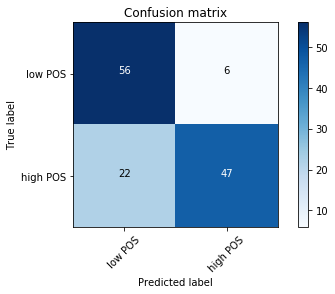

In [24]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low POS', 'high POS'],
                      title='Confusion matrix')

plt.show()

Regarding the classification report, the precision formula is TP/(TP+FP) while recall is TP/(TP+FN). Recall is the probability that a (randomly selected) relevant document is retrieved in a search. Precision is the probability that a (randomly selected) retrieved document is relevant. So here if we look at the positive or locations with high POS, the model will have a probability of 68% to pick this label in a random search. However, out of these locations with high performance selected, 89% will really be locations with high POS. The f1-score is a combination of both precision and recall. The recall accounts for the FN while the precision accounts for the FP. As for the confusion matrix, the model predicted 56 low POS correctly and 47 high POS correctly. It predicted 22 as low POS when it should have been high POS, and predicted 6 high POS when they should have been low POS.

Lasso picked 40 variables and eliminated the other 734 variables


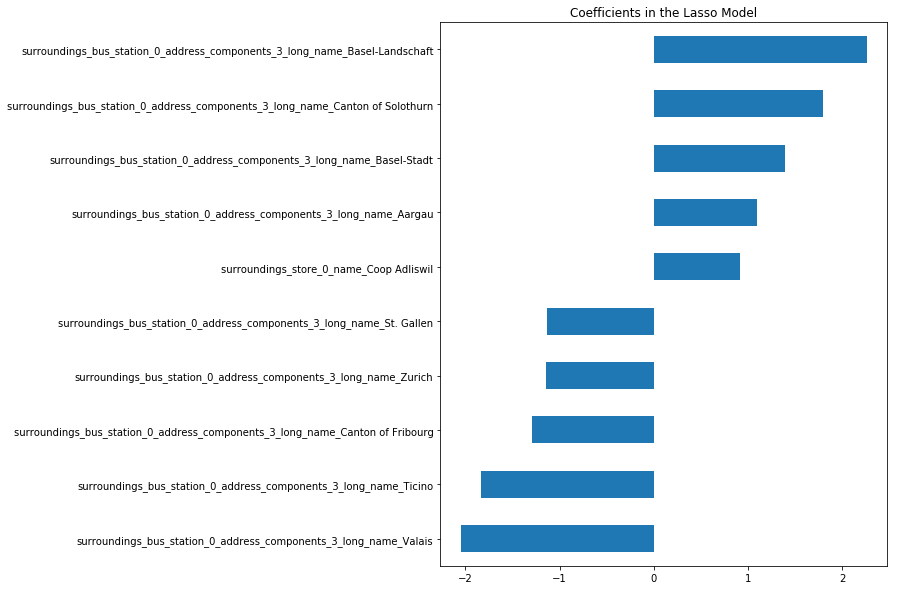

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
coef = pd.Series(clf.coef_[0], index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(5)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

We reach a performance of 78% if we look at the overall f1-score, which is not that bad. The classifier could still use some improvement espescially regarding the recall of the high POS label but overall it is quite decent. As for the features selected, the top 5 are Basel-landshaft, the canton of solothurn, Basel stadt, Aargau and a Coop.The bottom 5 are St.Gallen, Zurich, the canton of Fribourg, Ticino and Valais. As for the interpretation, what is shown are the log odds to increase the probability of having a top performance. The odds of an event is the probability of that event divided by its complement: p/1-p so for an event that has a probability of 0.75, the odds are 0.75/1-0.75  = 3. This means that this event is likely to happens 3 times more than not. The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds.

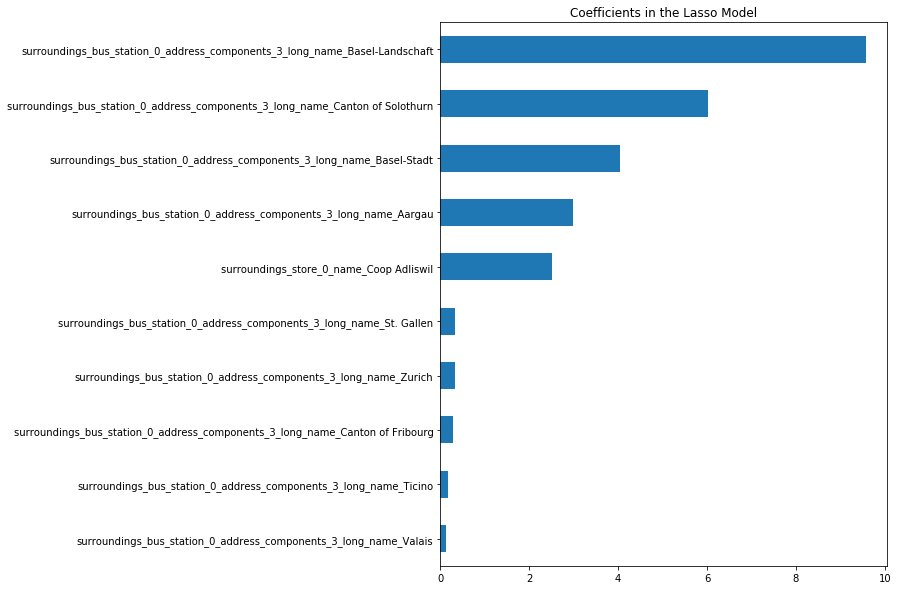

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
coef = pd.Series(np.exp(clf.coef_[0]), index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(5)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [122]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X_train, y_train)

In [123]:
for a, b in zip(X_train.columns, pvalues):
    print (a, b)
    
#surroundings_bus_station_0_address_components_3_long_name_Aargau 0.00396010365157274
#surroundings_bus_station_0_address_components_3_long_name_Basel-Landschaft 0.0006606187419627324
#surroundings_bus_station_0_address_components_3_long_name_Basel-Stadt 0.008941933381943669
#surroundings_bus_station_0_address_components_3_long_name_Canton of Solothurn 0.0009425877973391026
#surroundings_store_0_name_Coop Adliswil 0.14648024250960928
#surroundings_bus_station_0_address_components_3_long_name_St. Gallen 0.016612416477366478
#surroundings_bus_station_0_address_components_3_long_name_Ticino 0.0018747810300248486
#surroundings_bus_station_0_address_components_3_long_name_Valais 0.0034804372020670452
#surroundings_bus_station_0_address_components_3_long_name_Zurich 0.0022402799118741235
#surroundings_bus_station_0_address_components_3_long_name_Canton of Fribourg 0.02414118439991285

#Chi2 test was just computed to check whether our top5 and bottom5 features were actually significant for the default 
#0.05 threshold. Aside from Coop Adliswil, the others are significant which means we can interpret them.


surroundings_bus_station_0_address_components_3_long_name_Aargau 0.00396010365157274
surroundings_bus_station_0_address_components_3_long_name_Appenzell Innerrhoden nan
surroundings_bus_station_0_address_components_3_long_name_Appenzell Outer Rhodes 0.33009390556242163
surroundings_bus_station_0_address_components_3_long_name_Basel City 0.14648024250960928
surroundings_bus_station_0_address_components_3_long_name_Basel-Landschaft 0.0006606187419627324
surroundings_bus_station_0_address_components_3_long_name_Basel-Stadt 0.008941933381943669
surroundings_bus_station_0_address_components_3_long_name_Bern 0.6541470106463954
surroundings_bus_station_0_address_components_3_long_name_Canton of Bern 0.06788124855313392
surroundings_bus_station_0_address_components_3_long_name_Canton of Fribourg 0.02414118439991285
surroundings_bus_station_0_address_components_3_long_name_Canton of Glarus 0.33009390556242163
surroundings_bus_station_0_address_components_3_long_name_Canton of Jura 0.30452718874

surroundings_store_1_name_La Loggia Antichità nan
surroundings_store_1_name_La petite Provence Ruth Wunderer 0.30452718874532725
surroundings_store_1_name_Lacoste 0.09162505463047156
surroundings_store_1_name_Lang's Cafe Restaurant (Cafe Tobler) 0.33009390556242163
surroundings_store_1_name_Lebag Elektroinstallationen AG 0.33009390556242163
surroundings_store_1_name_Lehenmatt-Apotheke 0.30452718874532725
surroundings_store_1_name_Lenk Milch AG 0.14648024250960928
surroundings_store_1_name_Libosan.ch Erotikshop 0.30452718874532725
surroundings_store_1_name_Lindenapotheke AG 0.30452718874532725
surroundings_store_1_name_Lindenapotheke am Bach, Suhr 0.30452718874532725
surroundings_store_1_name_Ludothek Bürglen 0.33009390556242163
surroundings_store_1_name_Ludothek des GFV 0.30452718874532725
surroundings_store_1_name_Läderach 0.33009390556242163
surroundings_store_1_name_Lüthi Optik 0.30452718874532725
surroundings_store_1_name_MISTER MINIT nan
surroundings_store_1_name_MONN nan
surround

We can see that the location of basel landshaft has the highest odds positive. This means that putting a store near a bus station in basel lanshaft will increase the odds of being high performant in term of POS 8 times more than being a low performant store. The same can be applied if we put a store near a bus station in Solothurn, Aargau, or Basel stadt, but the odds of being high performant can also be increased if we place it near a Coop. This makes sense as Basel in per se is a really important Canton, both nationally and internationally so it would make sense that having a store at the places would be profitable. Same applies for the Coop, which is, alongside the migros, the get go supermarkt to buy pretty much everything, hence a crowded area meaning more people buying. On the other hand St.gallen, Ticino and Valais are quite isolated cantons, way less international attraction than Basel, so it would make sense not to build a store in these cantons with the hope of having high performances in term of POS.

However these results can be improved, as doing a train/test split can lead do different result and is highly dependent on the shuffling and the split. What can be done on the other hand is to use the variables selected by the previous model which have a coeffiscient different than 1 (if the exponential was used before, or 0 if the coeffiscients are still log), and use them in a different logistic regression using this time a 10 fold cross validation setting which will reduce the variance as it will do the average of 10 different splits which is much more powerfull than a single one that we have in a train/test split setting.

In [24]:
coef2 = coef[coef!=1.000000]
X = X[['surroundings_bus_station_0_address_components_3_long_name_Aargau', 'surroundings_bus_station_0_address_components_3_long_name_Basel City', 
     'surroundings_bus_station_0_address_components_3_long_name_Basel-Landschaft', 'surroundings_bus_station_0_address_components_3_long_name_Basel-Stadt', 
     'surroundings_bus_station_0_address_components_3_long_name_Canton of Bern', 'surroundings_bus_station_0_address_components_3_long_name_Canton of Fribourg', 
     'surroundings_bus_station_0_address_components_3_long_name_Canton of Obwalden', 'surroundings_bus_station_0_address_components_3_long_name_Canton of Schwyz', 
     'surroundings_bus_station_0_address_components_3_long_name_Canton of Solothurn', 'surroundings_bus_station_0_address_components_3_long_name_Canton of Zug', 
     'surroundings_bus_station_0_address_components_3_long_name_Geneva', 'surroundings_bus_station_0_address_components_3_long_name_Grisons', 
     'surroundings_bus_station_0_address_components_3_long_name_Lucerne', 'surroundings_bus_station_0_address_components_3_long_name_Nidwalden', 
     'surroundings_bus_station_0_address_components_3_long_name_St. Gallen', 'surroundings_bus_station_0_address_components_3_long_name_Thurgau', 
     'surroundings_bus_station_0_address_components_3_long_name_Ticino', 'surroundings_bus_station_0_address_components_3_long_name_Valais', 
     'surroundings_bus_station_0_address_components_3_long_name_Zurich', 'surroundings_bus_station_0_address_components_3_long_name_Zürich District', 
     'surroundings_restaurant_0_address_components_3_long_name_Aigle', 'surroundings_restaurant_0_address_components_3_long_name_Baden', 
     'surroundings_restaurant_0_address_components_3_long_name_Basel-Stadt', 'surroundings_restaurant_0_address_components_3_long_name_Burgdorf', 
     'surroundings_restaurant_0_address_components_3_long_name_Horgen', 'surroundings_restaurant_0_address_components_3_long_name_Lausanne', 
     'surroundings_restaurant_0_address_components_3_long_name_Nidwalden', 'surroundings_restaurant_0_address_components_3_long_name_Obwalden', 
     'surroundings_restaurant_0_address_components_3_long_name_Schwyz', 'surroundings_restaurant_0_address_components_3_long_name_Seftigen', 
     'surroundings_restaurant_0_address_components_3_long_name_Thun', 'surroundings_restaurant_0_address_components_3_long_name_Uster', 
     'surroundings_restaurant_0_address_components_3_long_name_Zug', 'surroundings_restaurant_0_address_components_3_long_name_Zürich', 
     'surroundings_store_0_name_Coop Adliswil', 'surroundings_store_0_name_Interdiscount', 'surroundings_store_0_name_Migros', 
     'surroundings_store_0_name_Vögele Shoes', 'surroundings_store_0_name_Swisscom', 'surroundings_store_1_name_Denner']]

In [25]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(LogisticRegression(random_state=42), X, y, cv=10)

print (metrics.classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.73      0.83      0.78       198
          1       0.80      0.70      0.75       198

avg / total       0.77      0.76      0.76       396



Confusion matrix, without normalization
[[164  34]
 [ 60 138]]


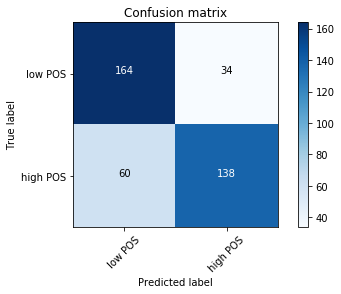

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predicted)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low POS', 'high POS'],
                      title='Confusion matrix')

plt.show()

On the surface, it appears to be a slightly worse model in term of overall performance. However the recall of the positive labels increased by 2% making it a more well rounded model in term of precision and recall on the positive and negative label. And as mentioned above, this model will be Truer as it will be the average of 10 difference splits thus will have less variance. The result is a more reliable estimate of the performance of the algorithm on new data given your test data. It is more accurate because the algorithm is trained and evaluated multiple times on different data. This means that overall, this model is actually better than the previous one.